# Simulating the Golenetskii correlation with popsynth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import popsynth
from popsynth.aux_samplers.trunc_normal_aux_sampler import TruncatedNormalAuxSampler
from popsynth.aux_samplers.lognormal_aux_sampler import LogNormalAuxSampler


%matplotlib widget

## GRB population

In [8]:
# redshift distribution
r0_true = 1. #1/20.
rise_true = 1.
decay_true = 4.0
peak_true = 1.5
r_max = 7.0


pop_gen = popsynth.populations.SFRPopulation(
    r0=r0_true,
    rise=rise_true,
    decay=decay_true,
    peak=peak_true,
    r_max=r_max,
    a=0.1,
)

## Auxiliary samplers

In [3]:
from zusammen.synthetic_populations.aux_samplers import DurationSampler, EpeakObsSampler, LumSampler

In [9]:
t90 = LogNormalAuxSampler(name="t90", observed=False)
t90.mu=np.log(10)
t90.tau=0.25

ep = LogNormalAuxSampler(name="ep", observed=False)
ep.mu=np.log(300)
ep.tau=0.4

nrest = LogNormalAuxSampler(name="nrest", observed=False)
nrest.mu = np.log(1e52)
nrest.tau = 0.1

gamma = TruncatedNormalAuxSampler(name="gamma", observed=False)
gamma.mu = 1.5
gamma.tau = 0.5
gamma.lower = 1.0
gamma.upper = 2.0

duration = DurationSampler()
obs_lum = LumSampler()
ep_obs = EpeakObsSampler()
duration.set_secondary_sampler(t90)
obs_lum.set_secondary_sampler(ep)
obs_lum.set_secondary_sampler(nrest)
obs_lum.set_secondary_sampler(gamma)
ep_obs.set_secondary_sampler(ep)

In [10]:
pop_gen.add_observed_quantity(duration)
pop_gen.add_observed_quantity(obs_lum)
pop_gen.add_observed_quantity(ep_obs)

## Survey

In [11]:
population = pop_gen.draw_survey()

Drawing distances:   0%|          | 0/18 [00:00<?, ?it/s]

 WARNING  |  NO HIDDEN OBJECTS 


Text(0, 0.5, '$L$ (erg/s)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
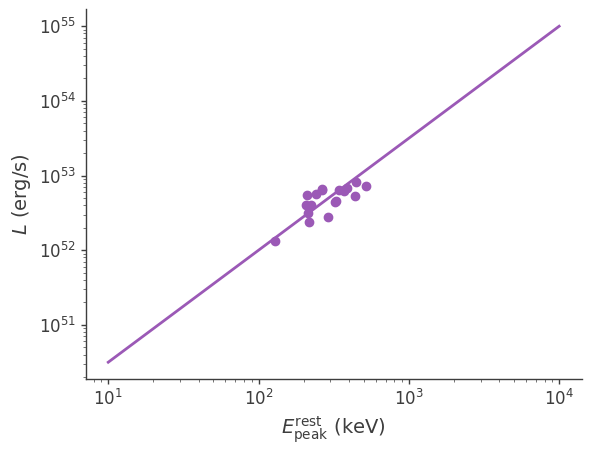

In [15]:
fig, ax = plt.subplots()
Egrid = 10**np.linspace(1, 4)

ax.scatter(population.ep, population.luminosities_latent )
#ax.scatter(10**population.log_ep, population.obs_lum)
ax.plot(Egrid, 1e52 * np.power(Egrid/100, 1.5))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$E_\mathrm{peak}^\mathrm{rest}$ (keV)')
ax.set_ylabel('$L$ (erg/s)')

In [14]:
population.ep

array([516.41018295, 217.42391756, 128.29526625, 262.53423655,
       210.41772754, 342.90781394, 371.85202937, 222.79461263,
       263.93448824, 207.95109464, 212.7068985 , 328.38170593,
       385.78985545, 323.23519436, 439.12047796, 445.42884186,
       291.41231346, 240.69758349])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
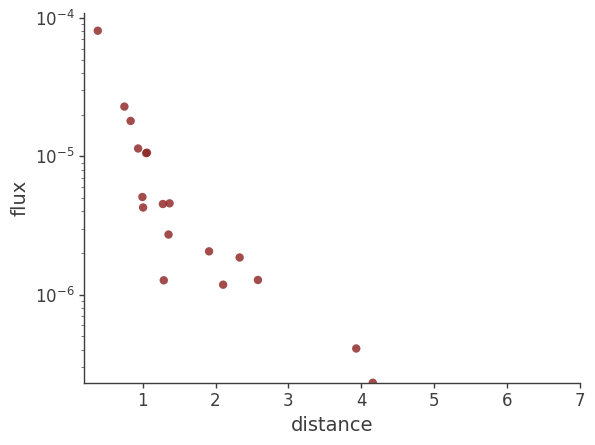

In [16]:
population.display_fluxes();

In [17]:
population.log_ep_start.max()

AttributeError: 'Population' object has no attribute 'log_ep_start'

Text(0, 0.5, '$F_E$ (erg $\\mathrm{s}^{-1}$ $\\mathrm{cm}^{-2}$)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
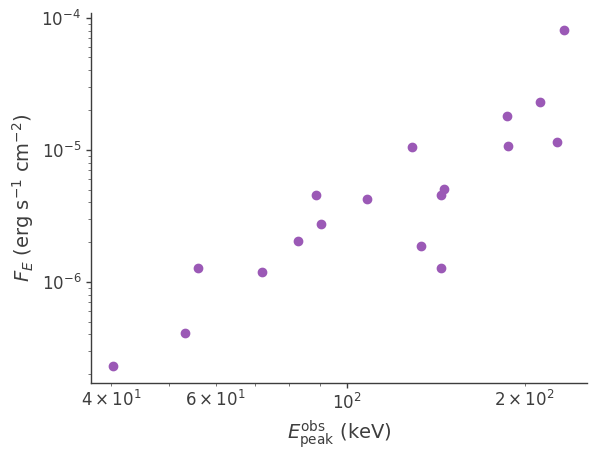

In [19]:
fig, ax = plt.subplots()
ax.scatter(population.ep_obs, population.fluxes_latent)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$E_\mathrm{peak}^\mathrm{obs}$ (keV)')
ax.set_ylabel('$F_E$ (erg $\mathrm{s}^{-1}$ $\mathrm{cm}^{-2}$)')

In [20]:
pos=nx.drawing.nx_agraph.graphviz_layout(pop_gen.graph, prog='dot')

nx.draw(pop_gen.graph, with_labels=True,pos=pos)

ImportError: requires pygraphviz http://pygraphviz.github.io/